In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 13s 0us/step


Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


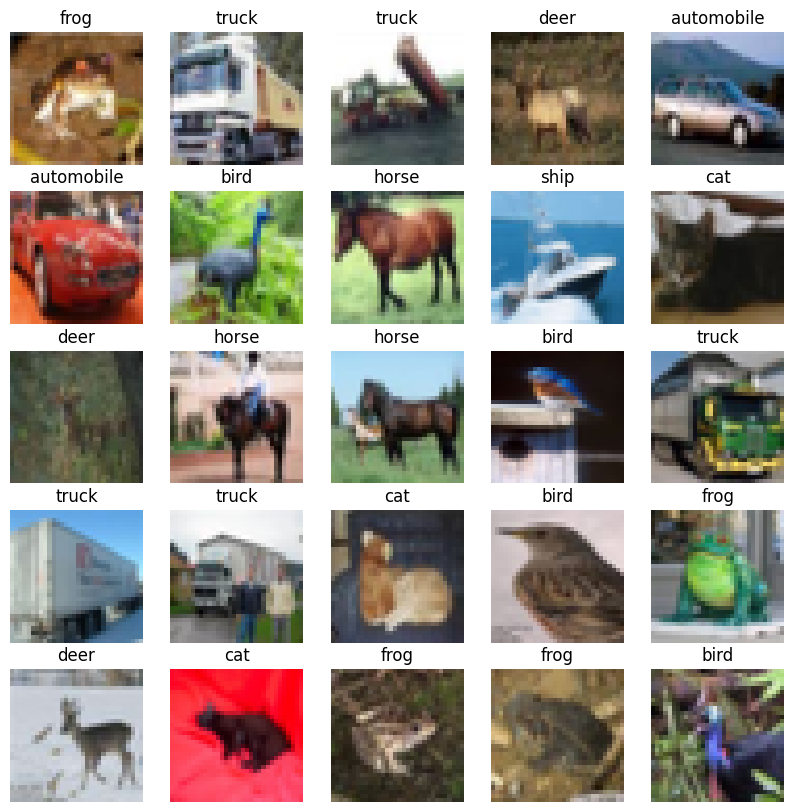

In [2]:
# Inspect the shape of the dataset
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

# Define class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# Display sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_labels[y_train[i][0]])
    plt.axis('off')
plt.show()

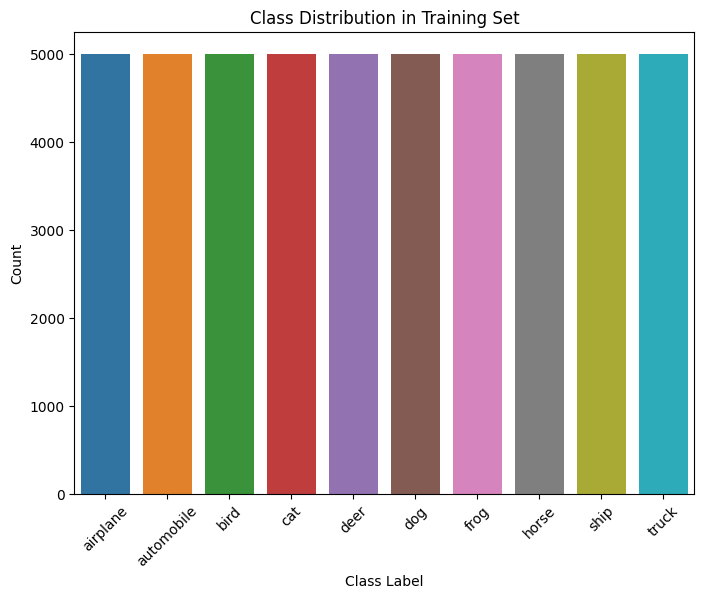

In [18]:
# Count the number of samples in each class
class_counts = np.bincount(y_train.flatten())

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_labels, y=class_counts)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

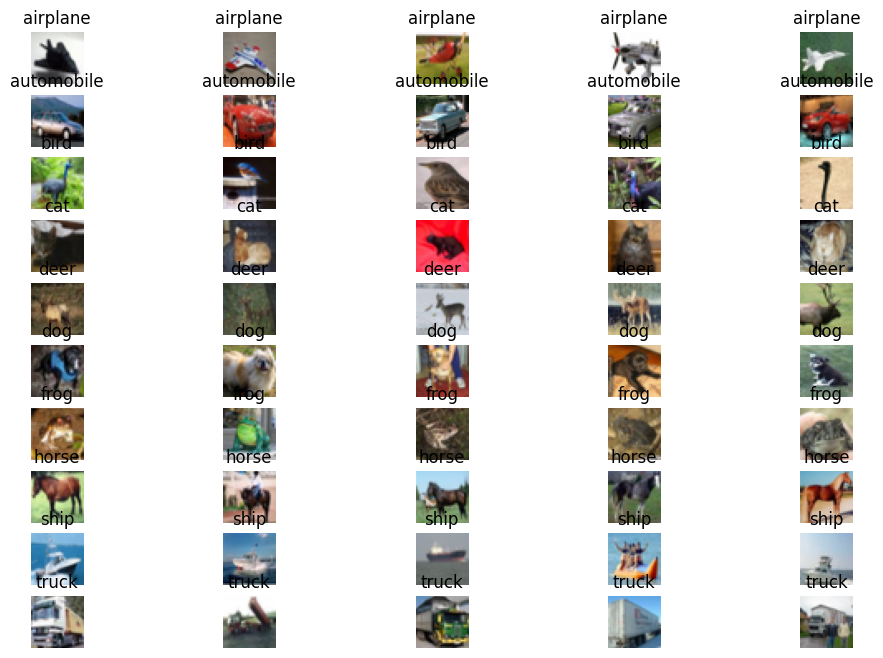

Mean pixel values: [125.30691805 122.95039414 113.86538318]
Standard deviation of pixel values: [62.99321928 62.08870764 66.70489964]


In [19]:

# Display sample images from each class
plt.figure(figsize=(12, 8))
for i in range(10):
    class_samples = np.where(y_train.flatten() == i)[0][:5]
    for j, sample_idx in enumerate(class_samples):
        plt.subplot(10, 5, i*5 + j + 1)
        plt.imshow(x_train[sample_idx])
        plt.title(class_labels[i])
        plt.axis('off')
plt.show()

# Calculate mean and standard deviation of pixel values
mean_pixel_values = np.mean(x_train, axis=(0, 1, 2))
std_pixel_values = np.std(x_train, axis=(0, 1, 2))

print("Mean pixel values:", mean_pixel_values)
print("Standard deviation of pixel values:", std_pixel_values)

In [20]:

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define LeNet-5 model
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 30
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))


Epoch 1/25
782/782 [==============================] - 6s 6ms/step - loss: 1.6492 - accuracy: 0.3955 - val_loss: 1.4421 - val_accuracy: 0.4793
Epoch 2/25
782/782 [==============================] - 4s 6ms/step - loss: 1.3898 - accuracy: 0.5010 - val_loss: 1.3520 - val_accuracy: 0.5154
Epoch 3/25
782/782 [==============================] - 4s 5ms/step - loss: 1.2877 - accuracy: 0.5399 - val_loss: 1.2869 - val_accuracy: 0.5389
Epoch 4/25
782/782 [==============================] - 4s 6ms/step - loss: 1.2224 - accuracy: 0.5667 - val_loss: 1.2041 - val_accuracy: 0.5677
Epoch 5/25
782/782 [==============================] - 4s 5ms/step - loss: 1.1542 - accuracy: 0.5919 - val_loss: 1.1731 - val_accuracy: 0.5811
Epoch 6/25
782/782 [==============================] - 4s 5ms/step - loss: 1.1012 - accuracy: 0.6100 - val_loss: 1.1612 - val_accuracy: 0.5876
Epoch 7/25
782/782 [==============================] - 5s 6ms/step - loss: 1.0572 - accuracy: 0.6248 - val_loss: 1.1400 - val_accuracy: 0.5966
Epoch 

In [22]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = tf.argmax(y_test, axis=1)

# Calculate accuracy
test_accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, true_labels), tf.float32))
print("Test Accuracy (Calculated):", test_accuracy.numpy())

# Calculate confusion matrix
confusion_matrix = tf.math.confusion_matrix(true_labels, predicted_labels)


Test Loss: 1.273651361465454
Test Accuracy: 0.6190000176429749
313/313 [==============================] - 1s 4ms/step
Test Accuracy (Calculated): 0.619


<Axes: >

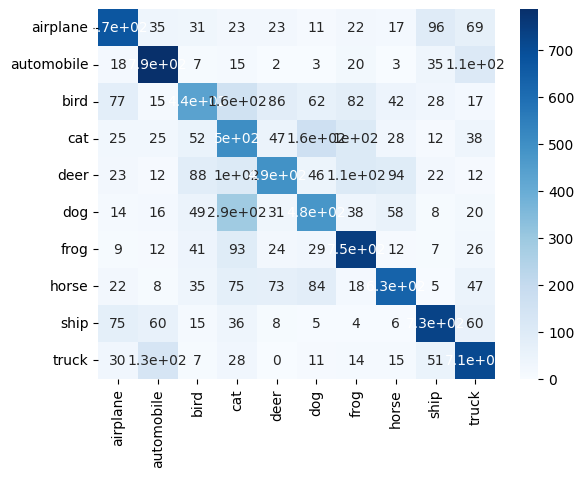

In [25]:
sns.heatmap(confusion_matrix, cmap="Blues", annot=True, xticklabels = class_labels, yticklabels = class_labels)

In [26]:
from tensorflow.keras.applications import ResNet50


In [27]:
# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the transfer learning model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 30
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

94765736/94765736 [==============================] - 1s 0us/step


Epoch 1/10
782/782 [==============================] - 18s 17ms/step - loss: 2.0459 - accuracy: 0.2522 - val_loss: 1.9007 - val_accuracy: 0.3167
Epoch 2/10
782/782 [==============================] - 13s 16ms/step - loss: 1.8818 - accuracy: 0.3167 - val_loss: 1.8434 - val_accuracy: 0.3412
Epoch 3/10
782/782 [==============================] - 13s 16ms/step - loss: 1.8212 - accuracy: 0.3403 - val_loss: 1.7994 - val_accuracy: 0.3388
Epoch 4/10
782/782 [==============================] - 13s 17ms/step - loss: 1.7865 - accuracy: 0.3564 - val_loss: 1.8237 - val_accuracy: 0.3370
Epoch 5/10
782/782 [==============================] - 13s 16ms/step - loss: 1.7613 - accuracy: 0.3646 - val_loss: 1.7328 - val_accuracy: 0.3811
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 1.7415 - accuracy: 0.3712 - val_loss: 1.7109 - val_accuracy: 0.3891
Epoch 7/10
782/782 [==============================] - 13s 16ms/step - loss: 1.7297 - accuracy: 0.3758 - val_loss: 1.7225 - val_accuracy:

In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Create CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 30
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))


Epoch 1/20
391/391 [==============================] - 9s 15ms/step - loss: 1.6239 - accuracy: 0.4023 - val_loss: 1.2940 - val_accuracy: 0.5236
Epoch 2/20
391/391 [==============================] - 5s 13ms/step - loss: 1.2333 - accuracy: 0.5579 - val_loss: 1.0757 - val_accuracy: 0.6168
Epoch 3/20
391/391 [==============================] - 6s 14ms/step - loss: 1.0522 - accuracy: 0.6265 - val_loss: 0.9732 - val_accuracy: 0.6573
Epoch 4/20
391/391 [==============================] - 5s 12ms/step - loss: 0.9352 - accuracy: 0.6703 - val_loss: 0.8471 - val_accuracy: 0.7037
Epoch 5/20
391/391 [==============================] - 5s 13ms/step - loss: 0.8554 - accuracy: 0.7008 - val_loss: 0.8329 - val_accuracy: 0.7073
Epoch 6/20
391/391 [==============================] - 5s 13ms/step - loss: 0.7913 - accuracy: 0.7211 - val_loss: 0.7392 - val_accuracy: 0.7410
Epoch 7/20
391/391 [==============================] - 5s 12ms/step - loss: 0.7395 - accuracy: 0.7407 - val_loss: 0.6957 - val_accuracy: 0.7610

313/313 [==============================] - 1s 3ms/step


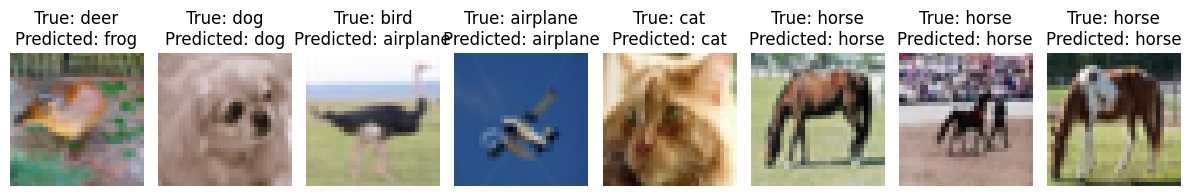

In [30]:

# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Get class labels for CIFAR-10
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Randomly select images for visualization
num_samples = 8
sample_indices = np.random.choice(range(len(x_test)), size=num_samples, replace=False)

# Plot sample images with predictions
plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices):
    image = x_test[idx]
    label = np.argmax(y_test[idx])

    # Get predicted label
    predicted_label = predicted_labels[idx]

    # Plot image
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(image)
    plt.axis('off')

    # Set title with true and predicted labels
    title = f'True: {class_labels[label]}\nPredicted: {class_labels[predicted_label]}'
    plt.title(title)

plt.tight_layout()
plt.show()